In [1]:
## Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [2]:
## Dataset Import
df_vgsales = pd.read_csv('./vgsales.csv')
start_number_rows = len(df_vgsales)

In [3]:
df_vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df_vgsales.head(30)

Rank                                          Name Platform    Year  \
0      1                                    Wii Sports      Wii  2006.0   
1      2                             Super Mario Bros.      NES  1985.0   
2      3                                Mario Kart Wii      Wii  2008.0   
3      4                             Wii Sports Resort      Wii  2009.0   
4      5                      Pokemon Red/Pokemon Blue       GB  1996.0   
5      6                                        Tetris       GB  1989.0   
6      7                         New Super Mario Bros.       DS  2006.0   
7      8                                      Wii Play      Wii  2006.0   
8      9                     New Super Mario Bros. Wii      Wii  2009.0   
9     10                                     Duck Hunt      NES  1984.0   
10    11                                    Nintendogs       DS  2005.0   
11    12                                 Mario Kart DS       DS  2005.0   
12    13                   Pokemon Gold/Pokemon Silver       GB  1999.0   
13    14                                       Wii Fit      Wii  2007.0   
14    15                                  Wii Fit Plus      Wii  2009.0   
15    16                            Kinect Adventures!     X360  2010.0   
16    17                            Grand Theft Auto V      PS3  2013.0   
17    18                 Grand Theft Auto: San Andreas      PS2  2004.0   
18    19                             Super Mario World     SNES  1990.0   
19    20  Brain Age: Train Your Brain in Minutes a Day       DS  2005.0   
20    21                 Pokemon Diamond/Pokemon Pearl       DS  2006.0   
21    22                              Super Mario Land       GB  1989.0   
22    23                           Super Mario Bros. 3      NES  1988.0   
23    24                            Grand Theft Auto V     X360  2013.0   
24    25                   Grand Theft Auto: Vice City      PS2  2002.0   
25    26                 Pokemon Ruby/Pokemon Sapphire      GBA  2002.0   
26    27                   Pokemon Black/Pokemon White       DS  2010.0   
27    28   Brain Age 2: More Training in Minutes a Day       DS  2005.0   
28    29                        Gran Turismo 3: A-Spec      PS2  2001.0   
29    30                Call of Duty: Modern Warfare 3     X360  2011.0   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Sports                     Nintendo     41.49     29.02      3.77   
1       Platform                     Nintendo     29.08      3.58      6.81   
2         Racing                     Nintendo     15.85     12.88      3.79   
3         Sports                     Nintendo     15.75     11.01      3.28   
4   Role-Playing                     Nintendo     11.27      8.89     10.22   
5         Puzzle                     Nintendo     23.20      2.26      4.22   
6       Platform                     Nintendo     11.38      9.23      6.50   
7           Misc                     Nintendo     14.03      9.20      2.93   
8       Platform                     Nintendo     14.59      7.06      4.70   
9        Shooter                     Nintendo     26.93      0.63      0.28   
10    Simulation                     Nintendo      9.07     11.00      1.93   
11        Racing                     Nintendo      9.81      7.57      4.13   
12  Role-Playing                     Nintendo      9.00      6.18      7.20   
13        Sports                     Nintendo      8.94      8.03      3.60   
14        Sports                     Nintendo      9.09      8.59      2.53   
15          Misc       Microsoft Game Studios     14.97      4.94      0.24   
16        Action         Take-Two Interactive      7.01      9.27      0.97   
17        Action         Take-Two Interactive      9.43      0.40      0.41   
18      Platform                     Nintendo     12.78      3.75      3.54   
19          Misc                     Nintendo      4.75      9.26      4.16   
20  Role-Playing   

### Dataset clearing

In [3]:
df_vgsales = df_vgsales.dropna()
df_vgsales.drop(columns='Rank', inplace=True)
number_rows_deleted = start_number_rows - len(df_vgsales)
number_rows_deleted

307

### Plot correlation between features

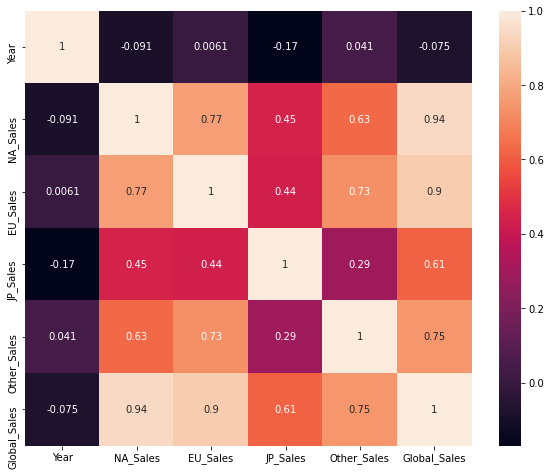

In [26]:
corr_matrix = df_vgsales.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [22]:
df_dummy_platform = pd.concat([df_vgsales['Global_Sales'], pd.get_dummies(df_vgsales['Platform'])], axis=1)
corr_matrix = df_dummy_platform.corr()

# Filter correlations with at least 1% with global sales
global_corr = corr_matrix['Global_Sales'].sort_values(ascending=False)
global_corr = global_corr[global_corr > 0.01]
global_corr = corr_matrix[global_corr.index].loc[global_corr.index]

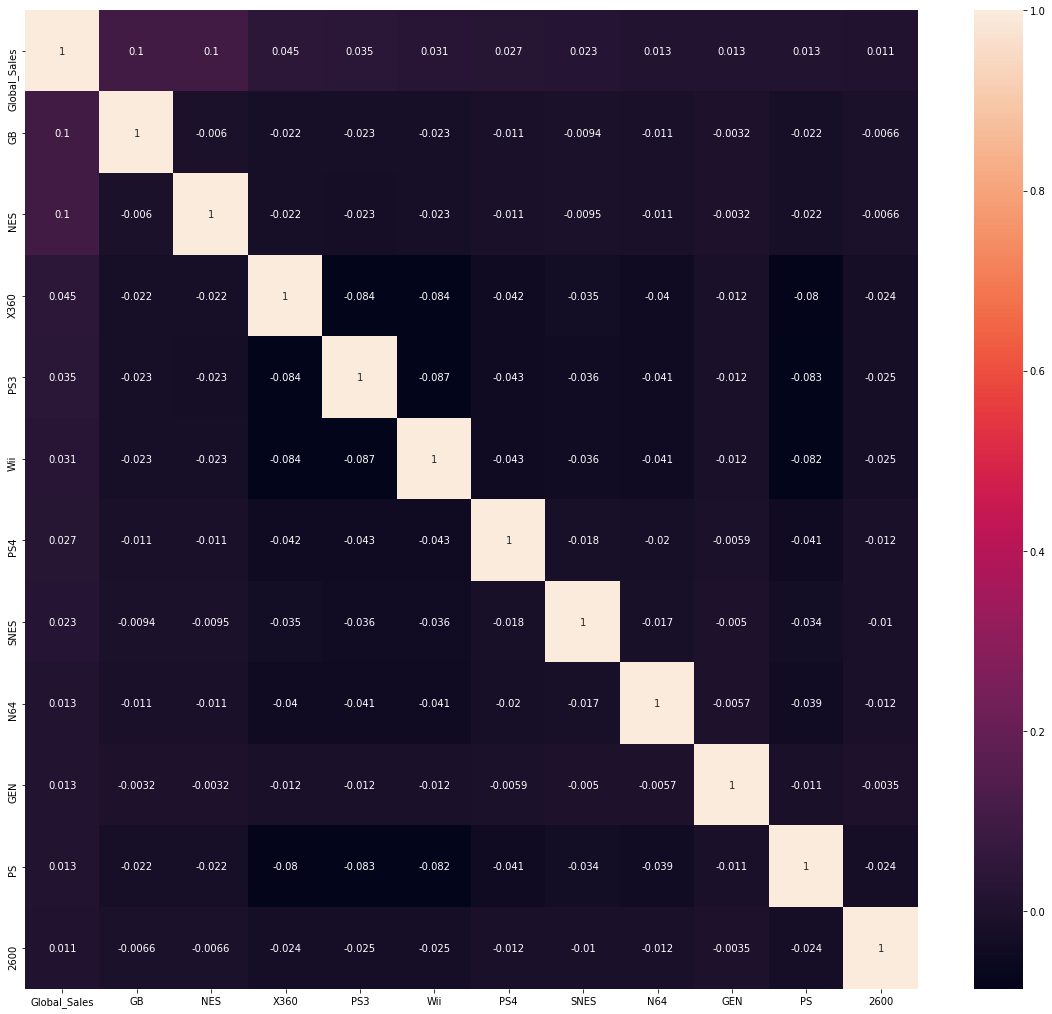

In [23]:
plt.figure(figsize=(20, 18))
sns.heatmap(global_corr, annot=True)
plt.show()

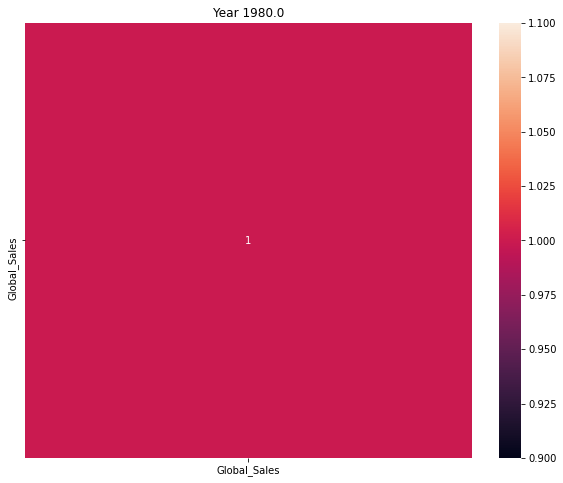

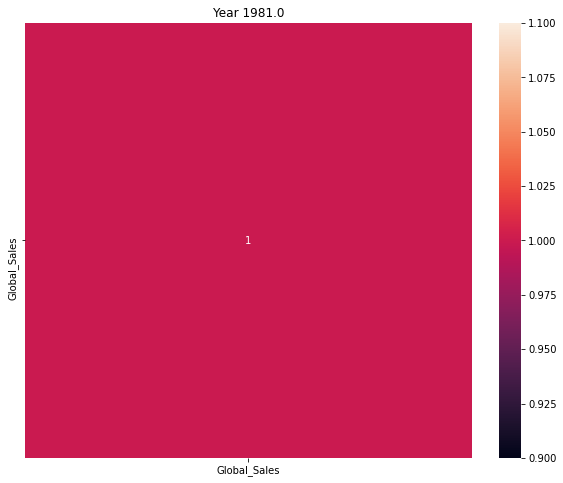

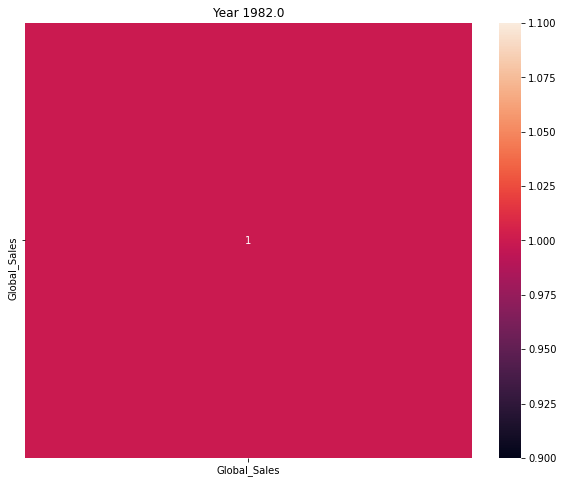

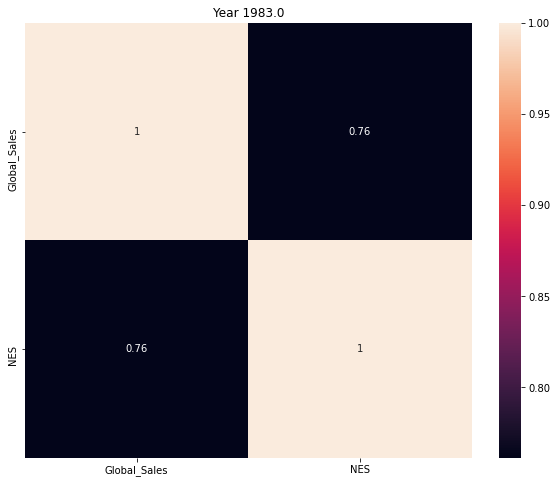

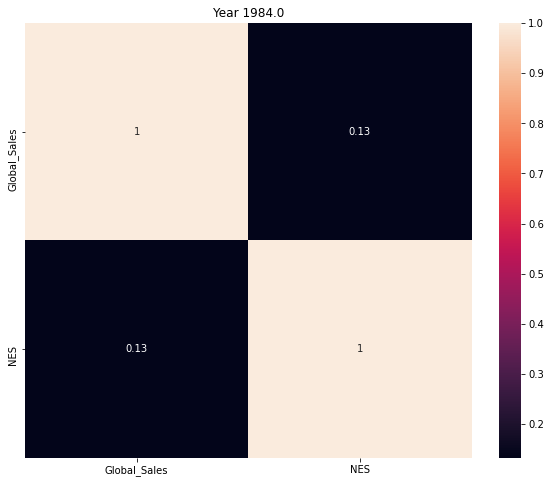

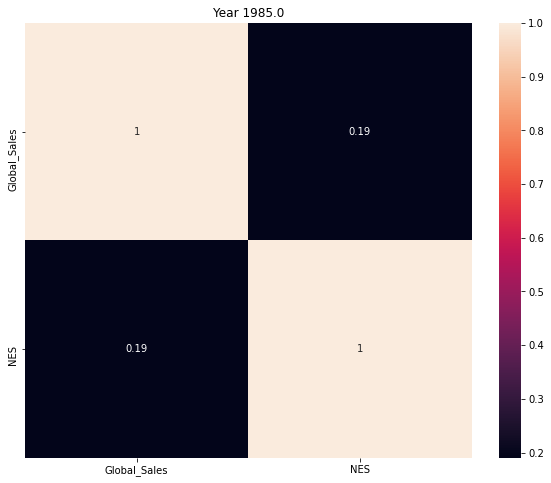

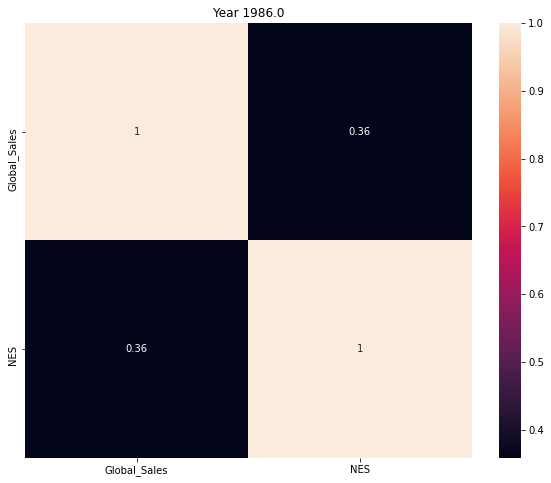

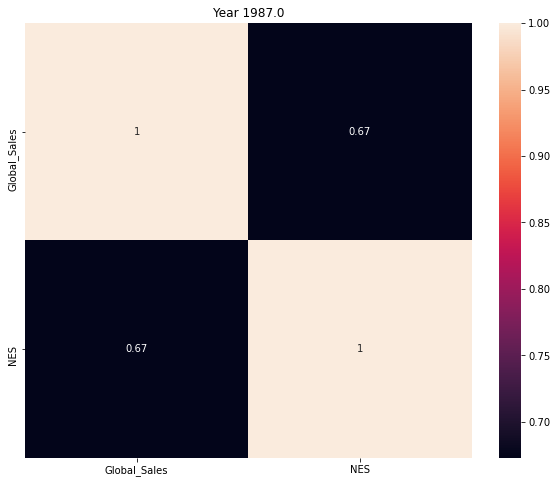

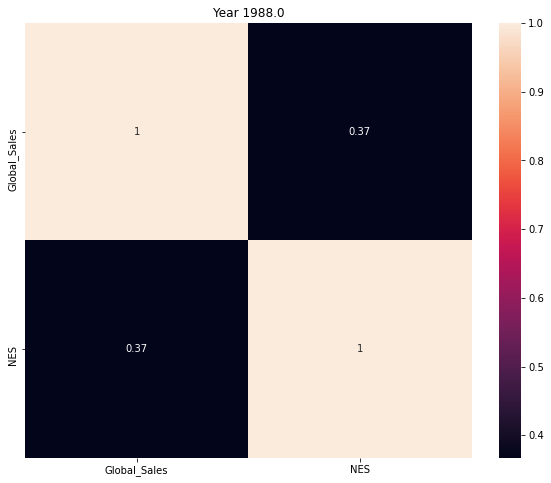

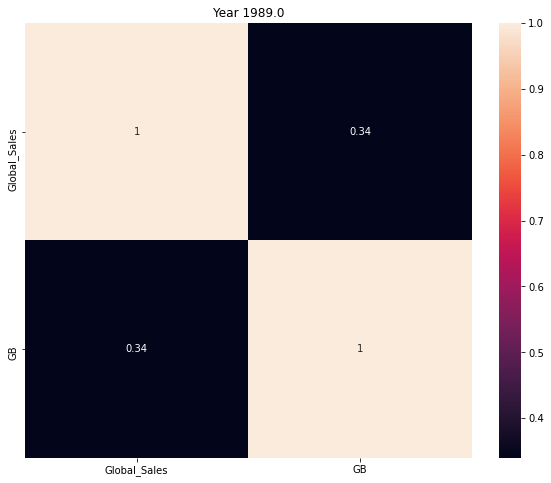

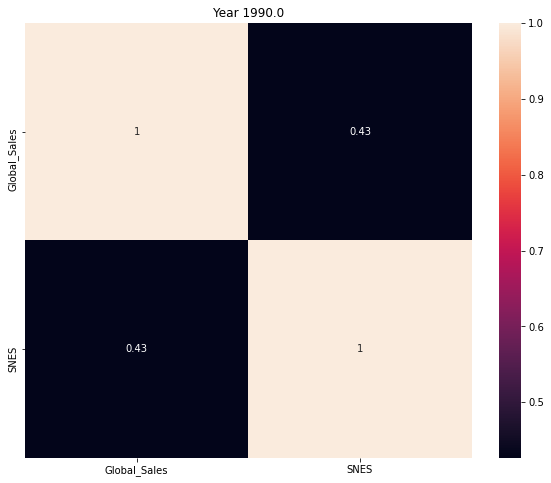

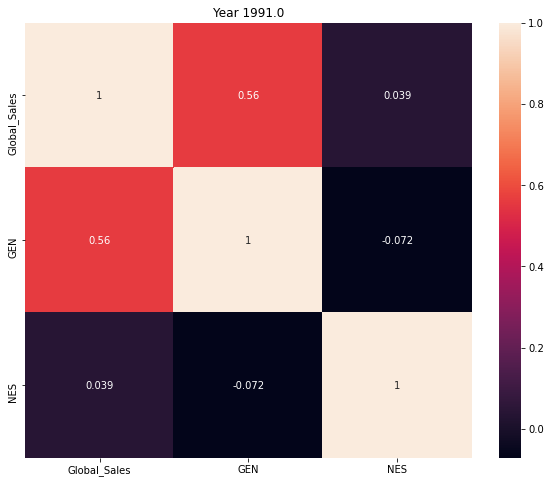

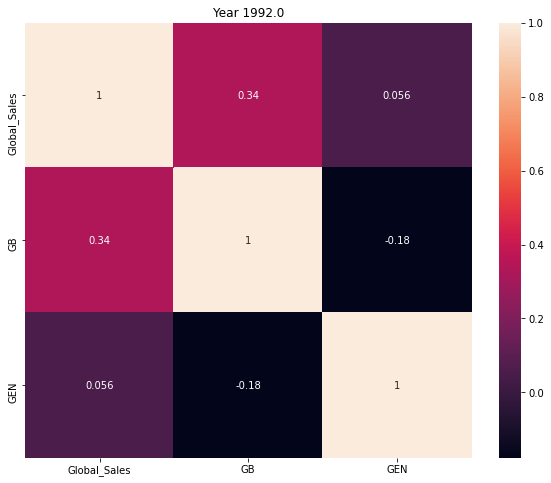

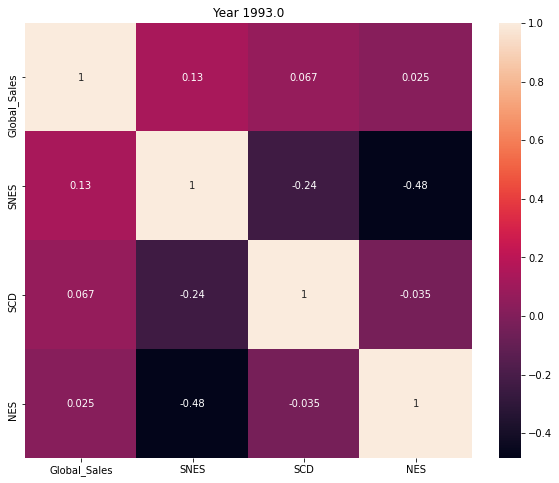

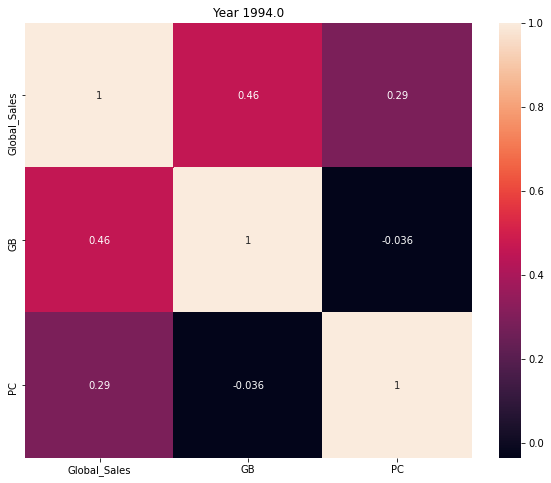

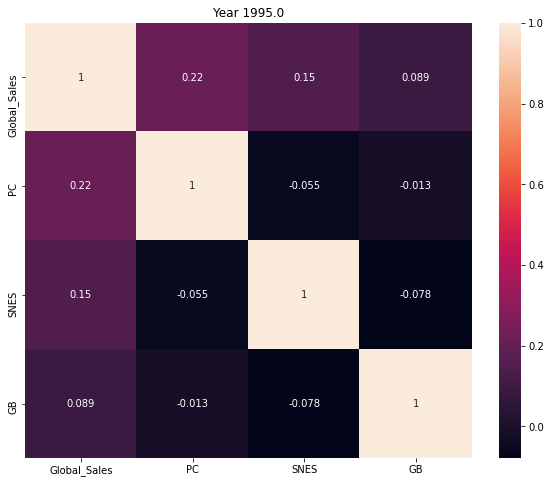

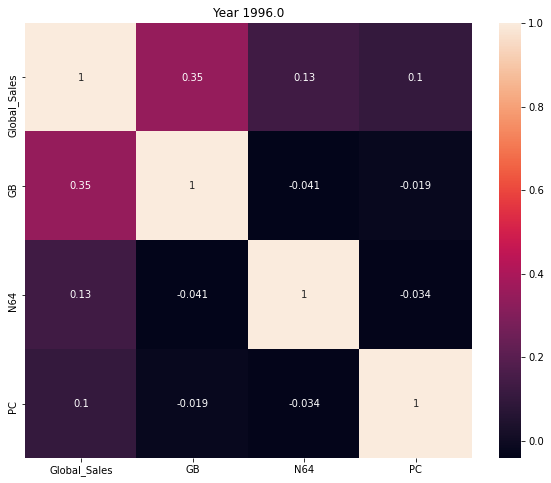

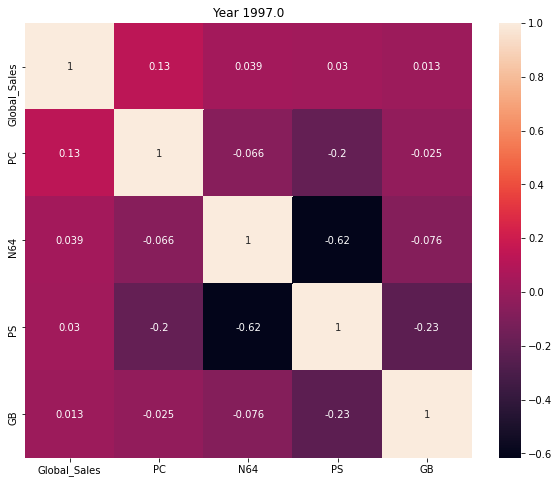

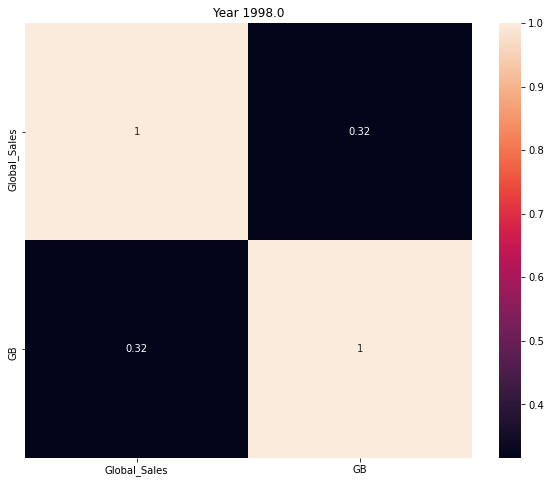

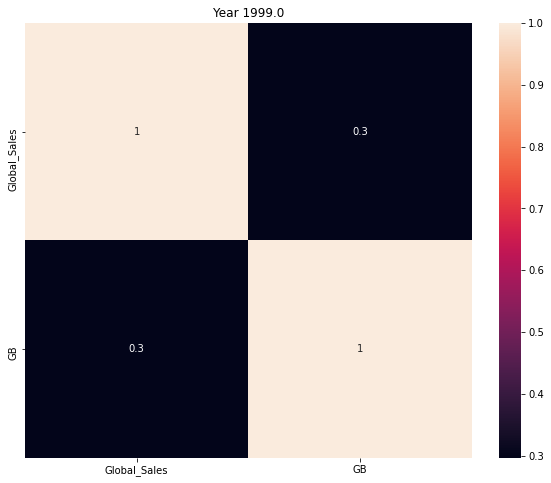

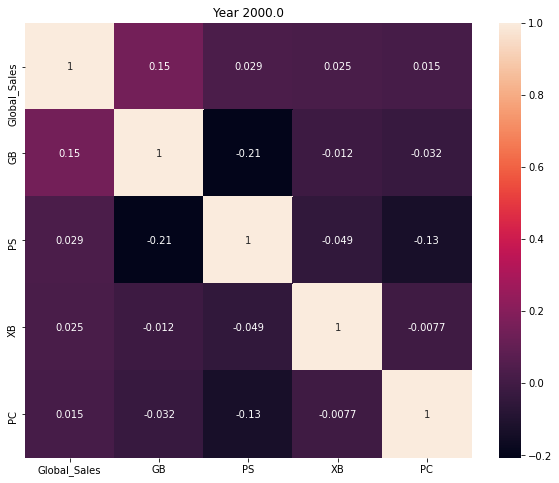

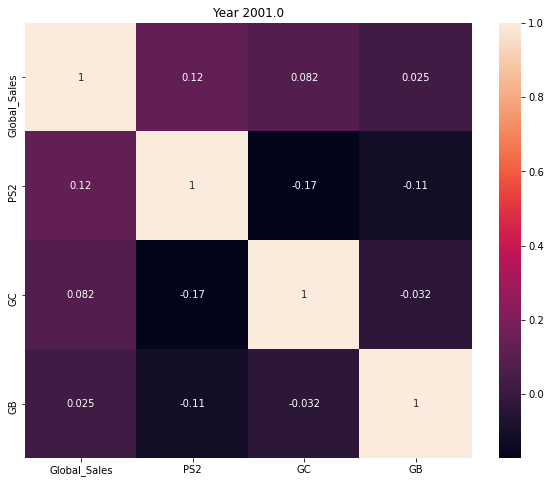

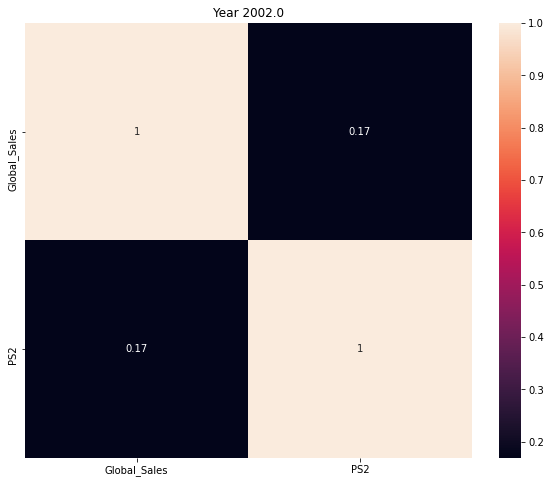

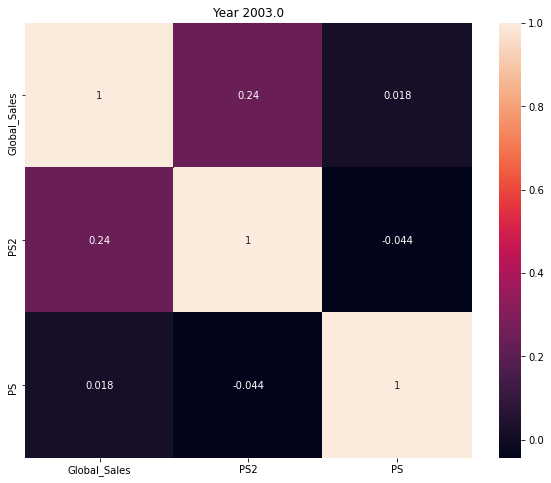

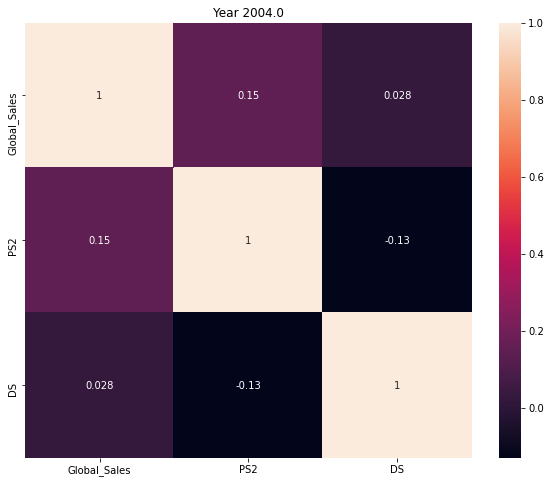

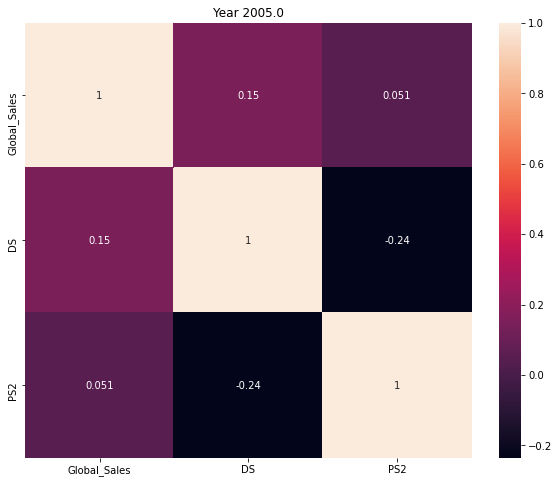

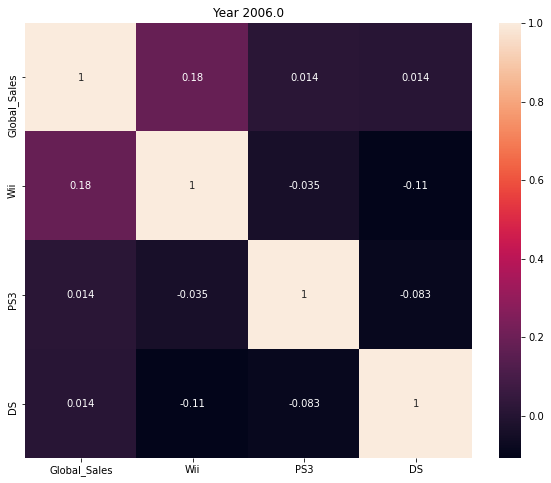

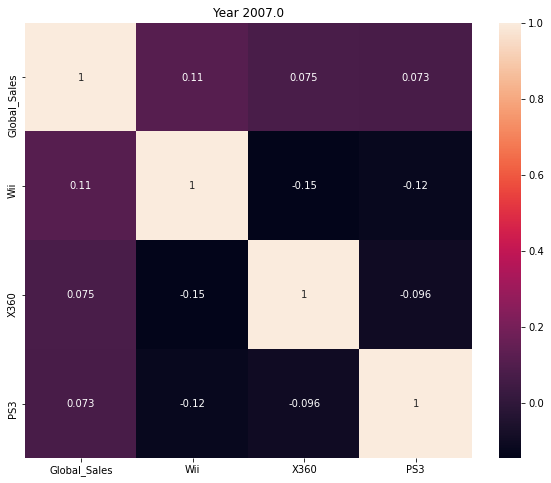

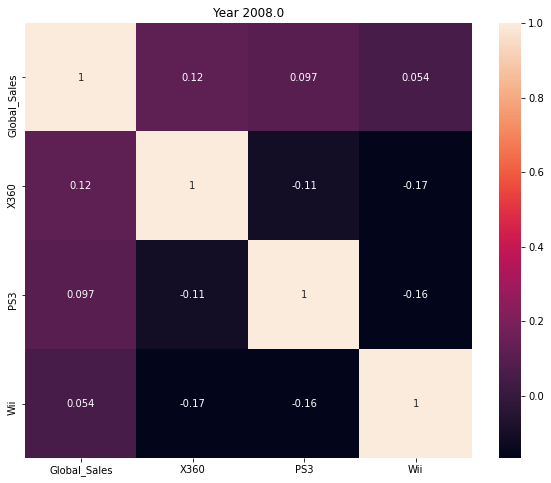

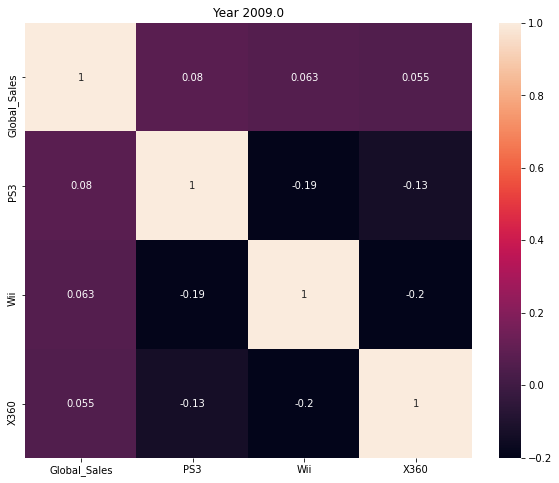

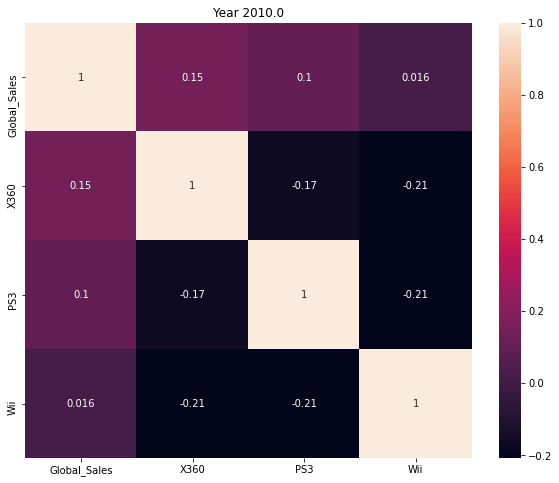

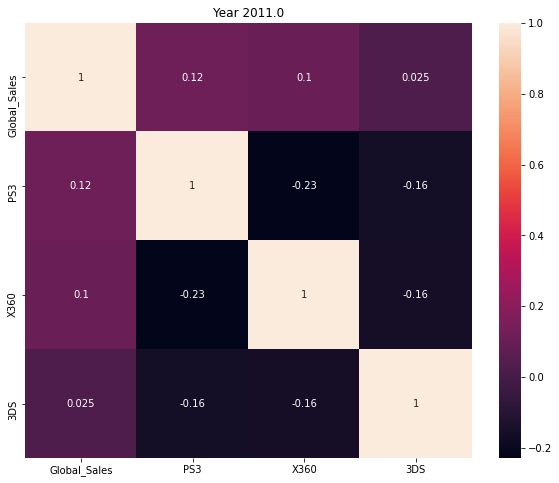

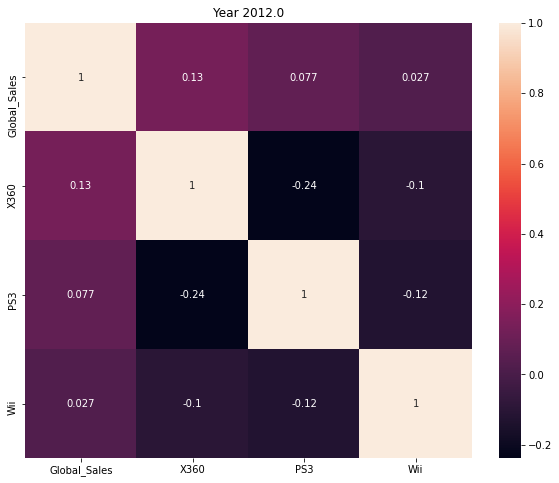

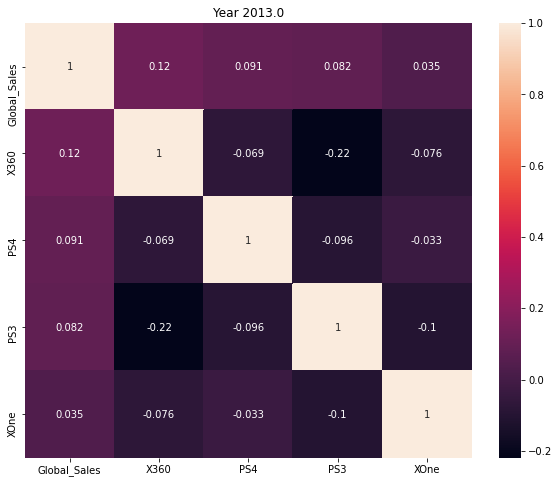

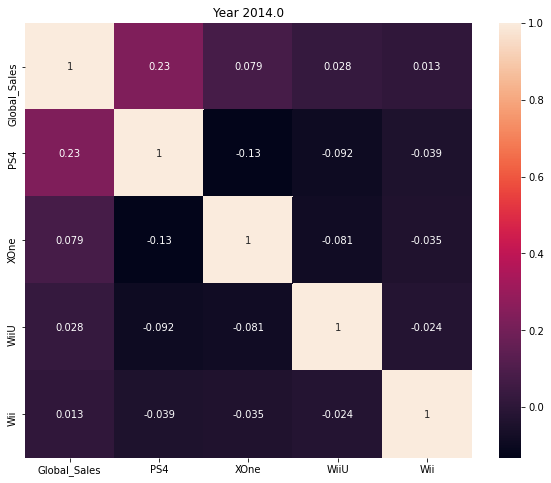

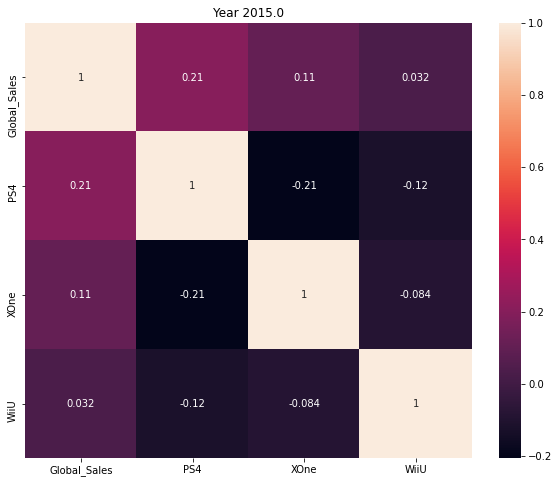

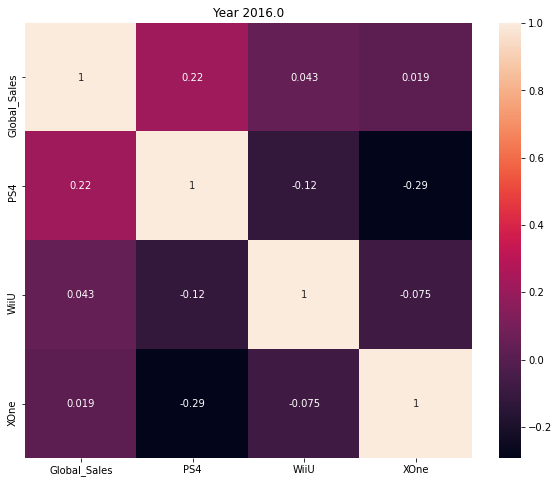

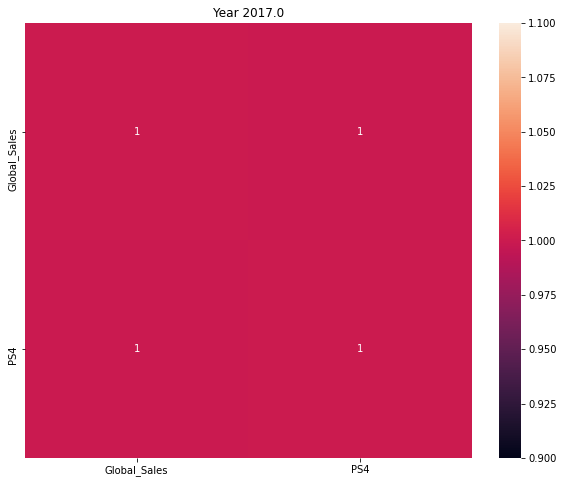

ValueError: zero-size array to reduction operation fmin which has no identity

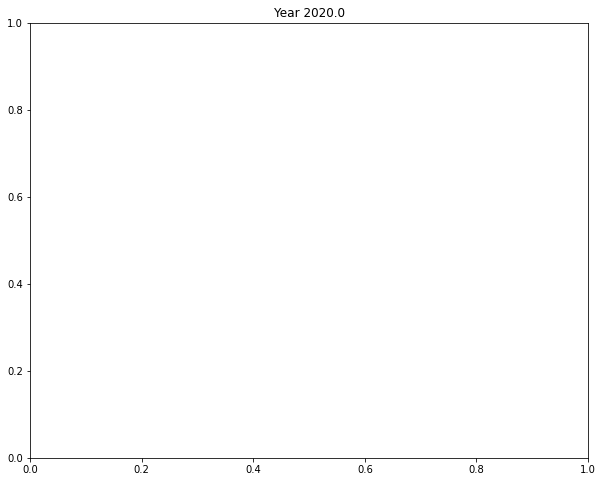

In [21]:
df_dummy_platform = pd.concat([df_vgsales['Global_Sales'], df_vgsales['Year'], pd.get_dummies(df_vgsales['Platform'])], axis=1)
for year, df_year in df_dummy_platform.groupby('Year', as_index=False):
    corr_matrix = df_year.corr()
    
    # Filter correlations with at least 1% with global sales
    global_corr = corr_matrix['Global_Sales'].sort_values(ascending=False)
    global_corr = global_corr[global_corr > 0.01]
    global_corr = corr_matrix[global_corr.index].loc[global_corr.index]
    
    plt.figure(figsize=(10, 8))
    plt.title(f'Year {year}')
    sns.heatmap(global_corr, annot=True)
    plt.show()

For each year there is a correlation between the global sales of a game and with it was launched for the top platform of that generation.  

In [77]:
df_dummy_platform = pd.concat([df_vgsales['Global_Sales'], pd.get_dummies(df_vgsales['Genre'])], axis=1)
corr_matrix = df_dummy_platform.corr()

# Filter correlations with at least 1% with global sales
global_corr = corr_matrix['Global_Sales'].sort_values(ascending=False)
global_corr = global_corr[global_corr > 0.01]
global_corr = corr_matrix[global_corr.index].loc[global_corr.index]

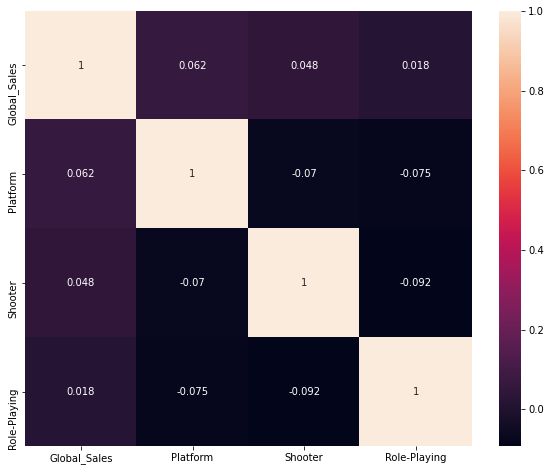

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(global_corr, annot=True)
plt.show()

In [81]:
df_dummy_platform = pd.concat([df_vgsales['Global_Sales'], pd.get_dummies(df_vgsales['Publisher'])], axis=1)
corr_matrix = df_dummy_platform.corr()

# Filter correlations with at least 1% with global sales
global_corr = corr_matrix['Global_Sales'].sort_values(ascending=False)
global_corr = global_corr[global_corr > 0.01]
global_corr = corr_matrix[global_corr.index].loc[global_corr.index]

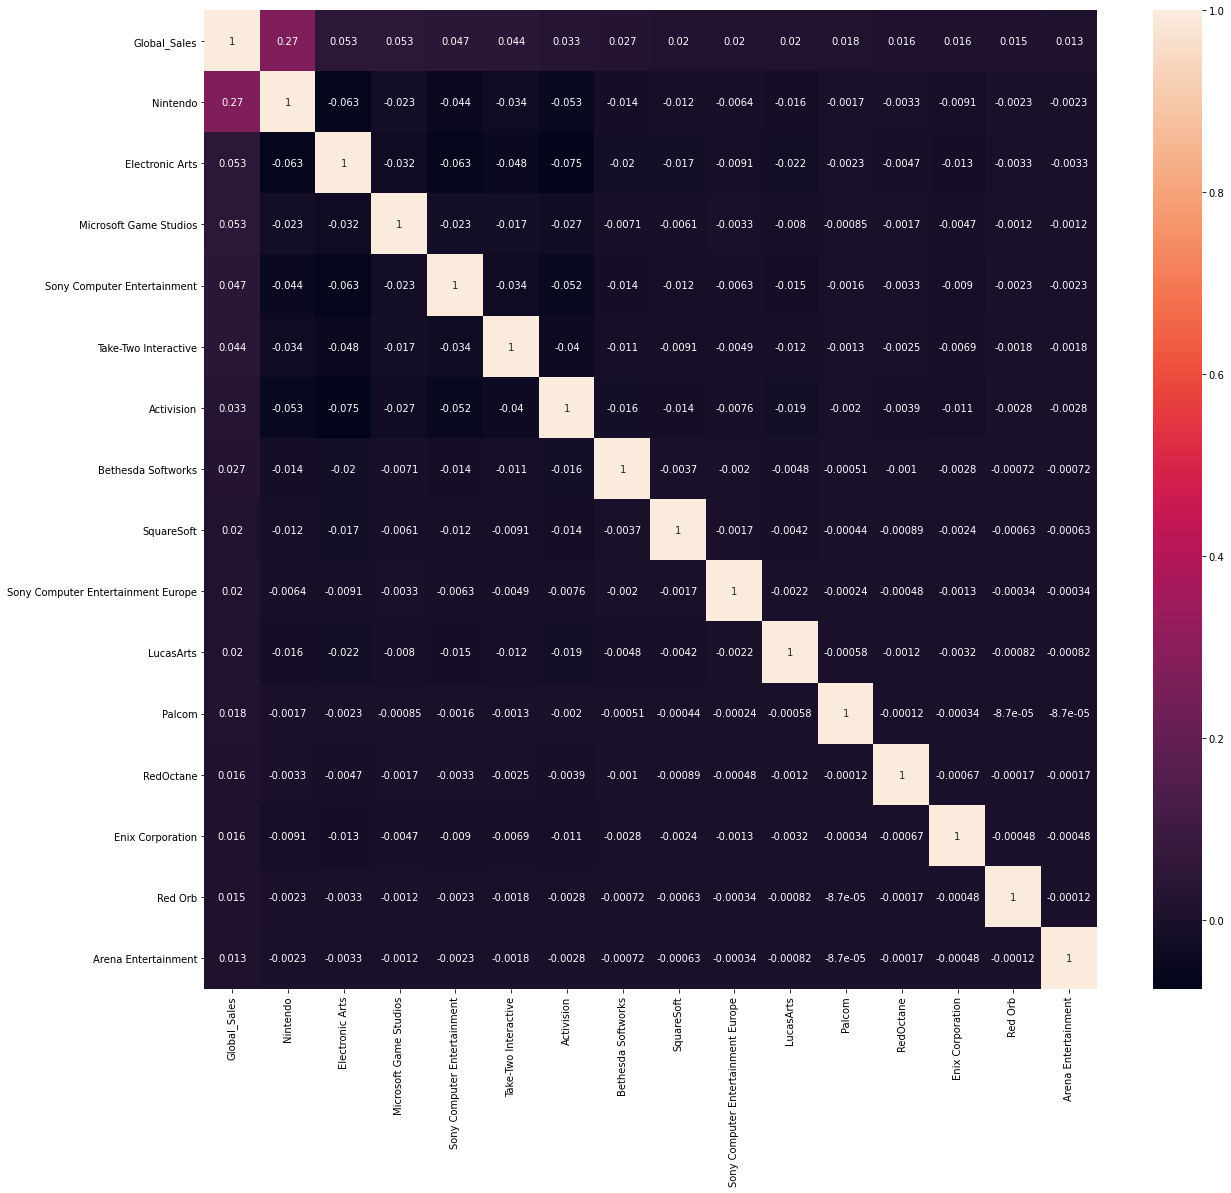

In [85]:
plt.figure(figsize=(20, 18))
sns.heatmap(global_corr, annot=True)
plt.show()

From the above plots we can infer that the global sales feature don't have a high correlation with any of the categorical features. Therefore, to predict if a game is going to sell well or not its recommended to analyse more variables. Possible candidate variables may be if a game is a sequel or not, reviews yearly demonstrations, how popular the game is previous to the launch (maybe a count of tweets) and so forth.

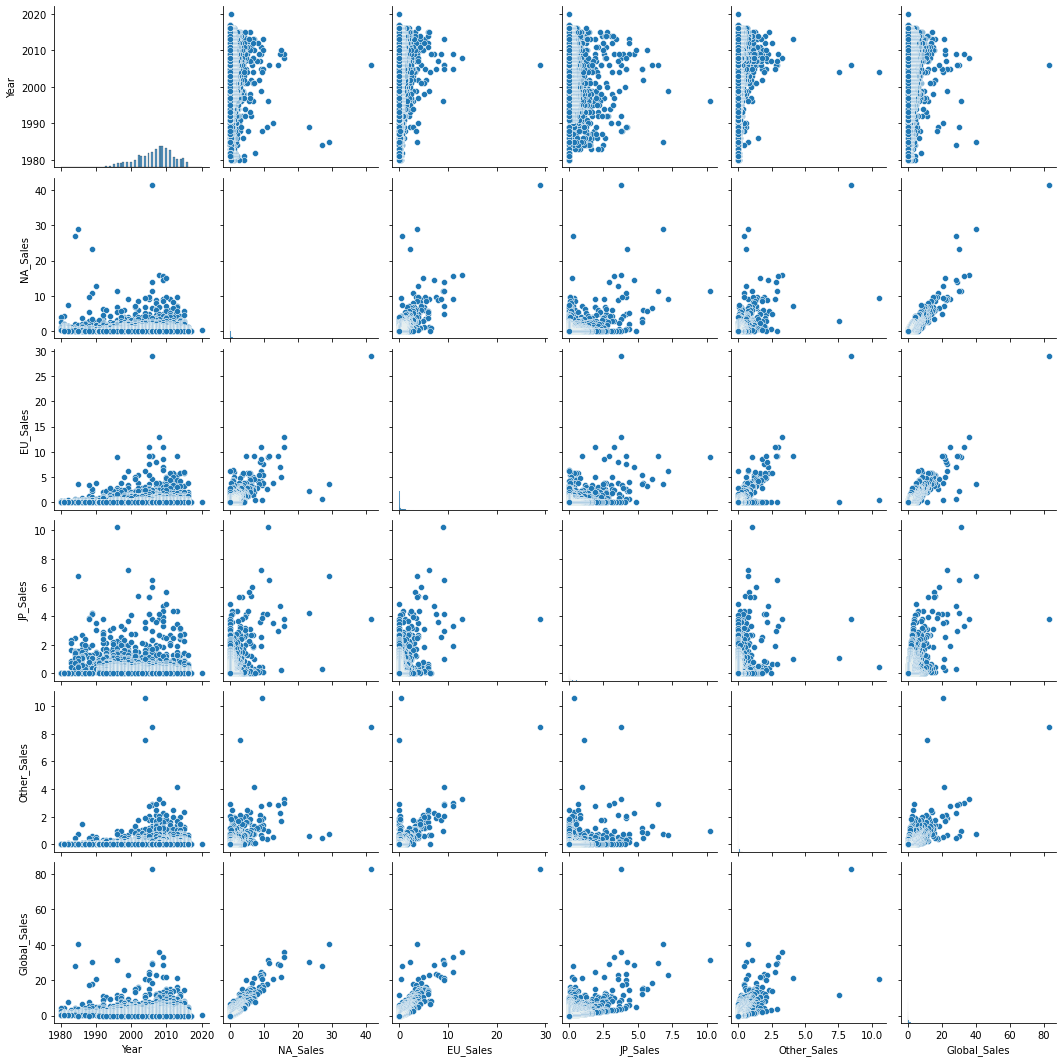

In [86]:
sns.pairplot(df_vgsales)

## Game Industry Exploration 

<BarContainer object of 39 artists>

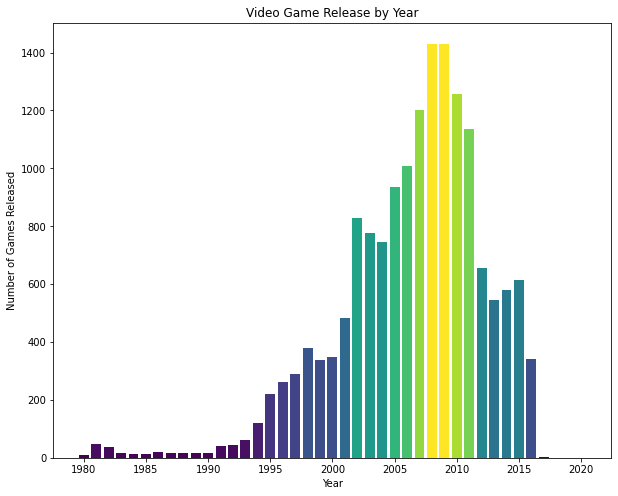

In [25]:
df_year_games = df_vgsales.groupby('Year', as_index=False)['Name'].count()

# For more color maps https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(10, 8))
plt.title('Video Game Release by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.bar(df_year_games['Year'], df_year_games['Name'], color=my_cmap(rescale(df_year_games['Name'])))

In [26]:
# Testing ploty lib
fig = go.Figure(go.Bar(x=df_year_games['Year'],y=df_year_games['Name'],
                       marker={'color': df_year_games['Name'],'colorscale': 'Viridis'}))

fig.update_layout(title_text='Video Game Release by Year', 
                  xaxis_title='Year', yaxis_title='Number of Games Released',
                  width=800)
fig.show()

In [131]:
df_year_games = df_vgsales.groupby('Year', as_index=False)['Global_Sales'].sum()

fig = go.Figure(go.Bar(x=df_year_games['Year'],y=df_year_games['Global_Sales'],
                       marker={'color': df_year_games['Global_Sales'],'colorscale': 'Viridis'}))

fig.update_layout(title_text='Global Sales per Year', 
                  xaxis_title='Year', yaxis_title='Number of Games Sold',
                  width=800)
fig.show()

In [187]:
df_year_games = df_vgsales.groupby('Year', as_index=False)['Global_Sales'].agg(['sum', 'count'])
df_year_games['avg'] = df_year_games['sum']/df_year_games['count']

fig = go.Figure(go.Box(x=df_vgsales['Year'],y=df_vgsales['Global_Sales']))

fig.update_layout(title_text='Global Sales per Year', 
                   xaxis_title='Year', yaxis_title='Number of Copies Sold')
fig.show()

In [188]:
fig = go.Figure(go.Line(x=df_year_games.index,y=df_year_games['avg']))

fig.update_layout(title_text='Average of Global Sales per Year', 
                   xaxis_title='Year', yaxis_title='Average of Games Sold')

fig.show()

In [194]:
df_year_games = df_vgsales.groupby('Year', as_index=False)['Publisher'].nunique()

fig = go.Figure(go.Bar(x=df_year_games['Year'],y=df_year_games['Publisher'],
                       marker={'color': df_year_games['Publisher'],'colorscale': 'Viridis'}))

fig.update_layout(title_text='Publishers per Year', 
                  xaxis_title='Year', yaxis_title='Number of Publishers',
                  width=800)
fig.show()

From 1980 until 1992 few titles were launched and on average more copies were sold. This could indicate that there were a demand greater than the offert. From 1993 until 2009 we saw an increase in games launched but a stabilization of copies sold on average. From 2010+ we saw an decrease in games launched  